# ***Processamento de Imagens e Visão Computacional com Python utilizando a biblioteca OPENCV***


# Sistema de detecção de faces humanas


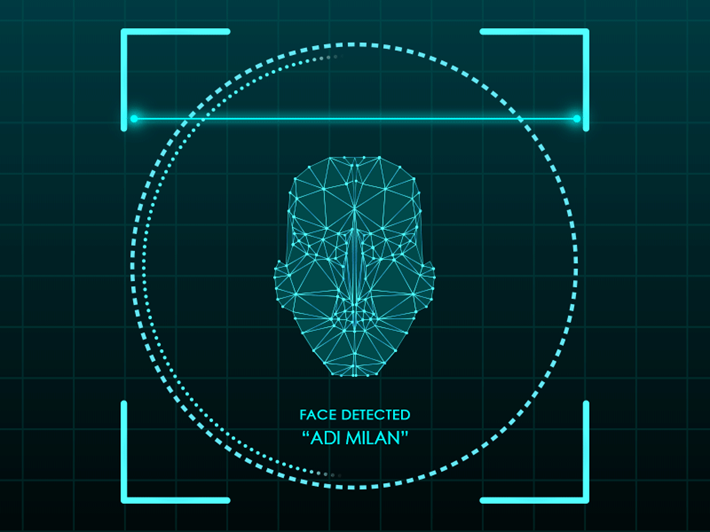

# **Lendo e Exibindo Imagem:**

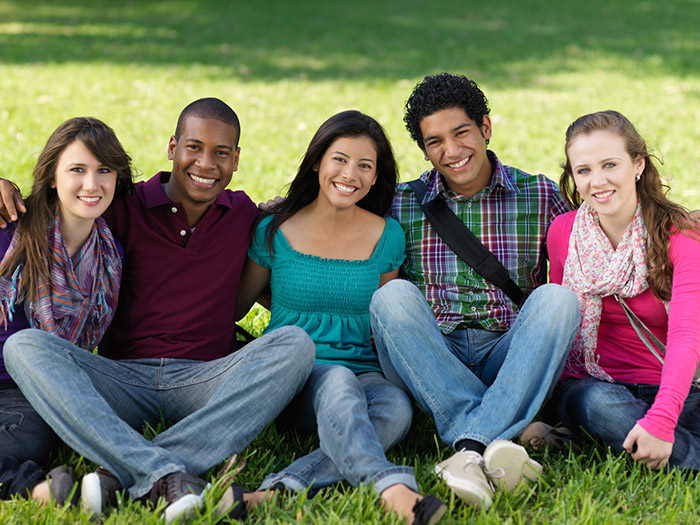

True

In [8]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Carregue uma imagem de uma URL ou arquivo
#imagem = cv2.imread('https://raw.githubusercontent.com/koyachi/go-lena/master/example/lena.result.jpg')

# Carregue a imagem do disco do colab (na pasta à esquerda)
imagem1 = cv2.imread('pessoas_uni2.jpg') # com OpenCV

# Exiba a imagem
cv2_imshow(imagem1)


#******************************************************************************
# Salvar a imagem na pasta local do Colab
cv2.imwrite('/content/imagem_faces1.png', imagem1)

# **Detecção de Faces com Open CV:**


O código abaixo é um exemplo de como usar a biblioteca OpenCV (Open Source Computer Vision Library) para detectar rostos em uma imagem.

1. **Importação de bibliotecas:**
   - `cv2`: É a biblioteca OpenCV, usada para processamento de imagens e visão computacional.
   - `cv2_imshow`: Importa a função `cv2_imshow` que permite mostrar imagens no ambiente do Google Colab.
   - `numpy as np`: Importa a biblioteca NumPy com um alias 'np', que é frequentemente usada para trabalhar com arrays e matrizes em Python.

2. **Carregar um classificador de cascata pré-treinado:**
   - O código carrega um classificador de cascata pré-treinado para detecção de faces. Esse classificador é baseado no algoritmo Haar Cascade e é usado para identificar objetos em imagens, neste caso, faces.

3. **Carregar a imagem e convertê-la em escala de cinza:**
   - A imagem 'pessoas_uni1.png' é lida usando `cv2.imread()`. A imagem é lida em escala de cinza (`cv2.IMREAD_GRAYSCALE`), o que simplifica o processamento de detecção de faces.

4. **Detecção de rostos na imagem:**
   - O código utiliza o classificador de cascata para detectar rostos na imagem. A função `detectMultiScale` é usada para realizar a detecção. Ela recebe a imagem em escala de cinza e alguns parâmetros, como `scaleFactor`, `minSize`, e `maxSize`, que afetam a detecção de rostos.

5. **Conversão para imagem colorida (BGR):**
   - Para desenhar retângulos verdes ao redor dos rostos detectados, a imagem em escala de cinza é convertida para a escala de cores BGR (Azul, Verde, Vermelho) usando `cv2.cvtColor()`.

6. **Desenhar retângulos verdes ao redor dos rostos:**
   - Um loop `for` é usado para percorrer as coordenadas dos rostos detectados. Para cada rosto detectado, um retângulo verde é desenhado ao redor dele usando `cv2.rectangle()`.

7. **Mostrar a imagem com os retângulos verdes:**
   - A imagem resultante, com os retângulos verdes ao redor dos rostos detectados, é exibida no ambiente do Google Colab usando `cv2_imshow()`.



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Carregar um classificador de cascata pré-treinado para detecção de faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carregar a imagem e convertê-la para escala de cinza
imagem2 = cv2.imread('pessoas_uni2.jpg', cv2.IMREAD_GRAYSCALE)

# Detectar rostos na imagem em escala de cinza
rostos = face_cascade.detectMultiScale(imagem2, scaleFactor=1.2, minSize=(10, 10), maxSize=(200, 200))

# Converter a imagem para BGR (colorida) para desenhar retângulos vermelhos
imagem2_bgr = cv2.cvtColor(imagem2, cv2.COLOR_GRAY2BGR)

# Desenhar retângulos verdes ao redor dos rostos detectados
for (x, y, w, h) in rostos:
    cv2.rectangle(imagem2_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Cor verde: (B, G, R) = (0, 255, 0)

# Mostrar a imagem com os retângulos verdes ao redor dos rostos detectados
cv2_imshow(imagem2_bgr)


#******************************************************************************
# Salvar a imagem na pasta local do Colab
cv2.imwrite('/content/imagem_faces2.png', imagem2)


# **Detecção de Faces e Aplicação em Privacidade com Open CV:**

1. **Detecção de Faces**:
   - O classificador de cascata é aplicado à imagem em escala de cinza usando `detectMultiScale()`. As faces detectadas são armazenadas na variável `faces`.

2. **Função de Aplicação de Filtro Gaussiano**:
   - Uma função chamada `aplicar_desfoque_gaussiano` é definida. Essa função aplica um filtro gaussiano a uma imagem de rosto para desfocá-la.

3. **Iteração sobre as Faces Detectadas**:
   - Um loop `for` itera sobre as coordenadas das faces detectadas. Para cada face, as coordenadas (x, y), largura (w) e altura (h) são obtidas.

4. **Aplicação do Filtro Gaussiano e Substituição na Imagem Original**:
   - Para cada face detectada, a região de interesse (ROI) correspondente ao rosto é obtida na imagem original.
   - A função `aplicar_desfoque_gaussiano` é chamada para aplicar um filtro gaussiano a essa região do rosto, desfocando-o.
   - A imagem original é atualizada, substituindo a região do rosto pelo rosto desfocado.

5. **Exibição da Imagem Resultante**:
   - A imagem resultante, com os rostos desfocados, é exibida no ambiente do Google Colab usando `cv2_imshow()`.

6. **Espera pela Interação do Usuário**:
    - O código aguarda até que o usuário pressione uma tecla, usando `cv2.waitKey(0)`. Isso permite que o usuário analise a imagem resultante antes de continuar.

7. **Fechamento de Janelas**:
    - Após a interação do usuário, todas as janelas abertas são fechadas usando `cv2.destroyAllWindows()`.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Carregar um classificador de cascata pré-treinado para detecção de faces
classificador_faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carregar a imagem
imagem3 = cv2.imread('pessoas_uni2.jpg')

# Converter a imagem para escala de cinza para detecção de faces
imagem3_cinza = cv2.cvtColor(imagem3, cv2.COLOR_BGR2GRAY)

# Detectar as faces na imagem
faces = classificador_faces.detectMultiScale(imagem3_cinza, scaleFactor=1.2, minSize=(10, 10), maxSize=(100, 100))

# Função para aplicar o filtro gaussiano a uma imagem de rosto
def aplicar_desfoque_gaussiano(rosto):
    return cv2.GaussianBlur(rosto, (0, 0), sigmaX=8)

# Iterar sobre as faces detectadas
for (x, y, w, h) in faces:
    # Obter a região de interesse (rosto)
    regiao_rosto = imagem3[y:y+h, x:x+w]

    # Aplicar o filtro gaussiano ao rosto
    rosto_desfocado = aplicar_desfoque_gaussiano(regiao_rosto)

    # Substituir o rosto original pelo rosto desfocado na imagem final
    imagem3[y:y+h, x:x+w] = rosto_desfocado

# Mostrar a imagem resultante com os rostos desfocados
cv2_imshow(imagem3) #com opencv


#******************************************************************************
# Salvar a imagem na pasta local do Colab
cv2.imwrite('/content/imagem_faces3.png', imagem3)

# **Detecção de Faces e Sorrisos com Open CV:**

Este código usa a biblioteca OpenCV para detectar faces e sorrisos em uma imagem.

1. Importa as bibliotecas necessárias.
2. Carrega classificadores pré-treinados para detecção de faces e sorrisos.
3. Carrega uma imagem em tons de cinza.
4. Detecta faces na imagem e, para cada face detectada, procura sorrisos.
5. Desenha retângulos verdes ao redor das faces com sorrisos detectados.
6. Mostra a imagem resultante com as detecções.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Carregar os classificadores pré-treinados para detecção de faces e sorrisos
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Carregar e converter a imagem para escala de cinza para detecção
imagem4 = cv2.imread('pessoa_seria_sorrindo.jpg')
imagem4_cinza = cv2.cvtColor(imagem4, cv2.COLOR_BGR2GRAY)

# Detectar faces na imagem
faces = face_cascade.detectMultiScale(imagem4_cinza, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), maxSize=(300, 300))

# Definir a cor verde (BGR)
cor_verde = (0, 255, 0)

# Para cada face detectada, detectar sorrisos
for (x, y, w, h) in faces:
    roi_gray = imagem4_cinza[y:y+h, x:x+w]
    roi_color = imagem4[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)

    # Se sorrisos forem detectados, desenhar um retângulo verde ao redor da face
    if len(smiles) > 0:
        cv2.rectangle(imagem4, (x, y), (x + w, y + h), cor_verde, 2)

# Mostrar a imagem resultante
cv2_imshow(imagem4) #com opencv


#******************************************************************************
# Salvar a imagem na pasta local do Colab
cv2.imwrite('/content/imagem_faces4.png', imagem4)